# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#use this cell to import additional libraries or define helper functions
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving household_power_consumption.txt to household_power_consumption.txt


## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [4]:
#Above is Txt file from UCI Repo
# Record count =

# Read the .txt file
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ';')

# Convert and save the DataFrame as a .csv file
df_raw.to_csv("household_power_consumption.csv", index=False)

# Optionally, display the first few rows of the DataFrame to verify
print(df_raw.head())


<ipython-input-4-4f6868c9823e>:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ';')


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [5]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [7]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [8]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


# Combine 'Date' and 'Time' columns into 'Datetime' and convert to datetime datatype
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original 'Date' and 'Time' columns
#df_raw = df_raw.drop(columns=['Date', 'Time'])

# Save the DataFrame as a .csv file
df.to_csv("household_power_consumption.csv", index=False)

# Display the DataFrame with the new 'Datetime' column
print(df.dtypes)
print(df.head())




Date                             object
Time                             object
Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  \
0           18.400          0.000          1.000 

In [9]:
#convert all data columns to numeric types
# Convert the rest of the columns to numeric types and handle errors
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Set invalid parsing to NaN

# Display the DataFrame with updated data types
print(df.dtypes)
print(df.head())

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.

In [10]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2075259
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-06 07:12:59.999994112
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN


In [12]:
#create your Datetime column
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-12-d9f29fbc2aae>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-12-d9f29fbc2aae>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [18]:
#create your Datetime column
df['Date'] = pd.to_datetime(df_raw['Date']) # Use the original 'Date' column from df_raw
df['Time'] = pd.to_datetime(df_raw['Time'], format='%H:%M:%S').dt.time # Use the original 'Time' column from df_raw and format it

<ipython-input-18-c7b65a0da724>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df_raw['Date']) # Use the original 'Date' column from df_raw


In [19]:
df.dtypes

,0
Date,datetime64[ns]
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


In [20]:
df.Date[0]

Timestamp('2006-12-16 00:00:00')

In [ ]:
#convert all data columns to numeric types
Already handled

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [21]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [22]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [23]:
df.Date[0]

datetime.date(2006, 12, 16)

In [24]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [25]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

In [26]:
    #df.describe(datetime_is_numeric = True)
    #TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

    #type error in colab due to old py pandas version 2.2.2,  using syntax accordigly
    df.describe(include=['number', 'datetime'])

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2075259
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-06 07:12:59.999994112
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN


In [27]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


<Axes: >

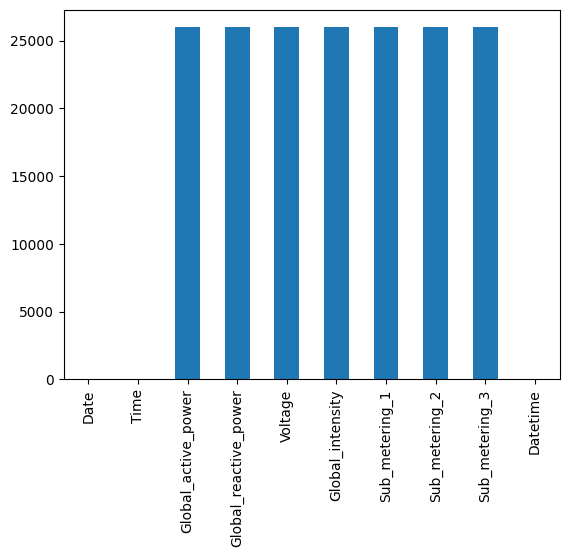

In [28]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

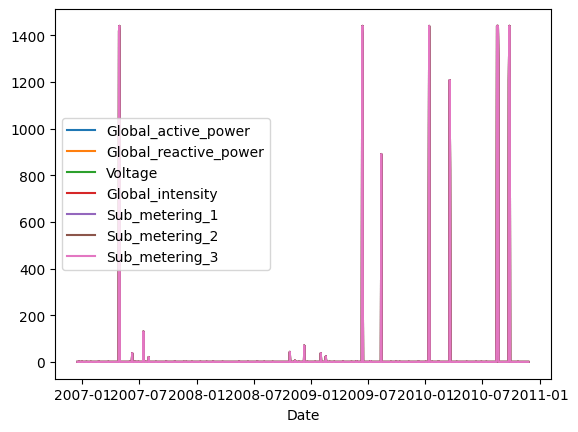

In [29]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

<Axes: xlabel='Date'>

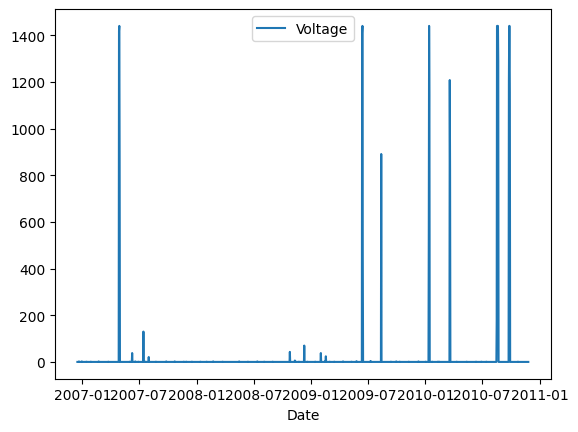

In [30]:
df_na.plot(x='Date', y='Voltage')

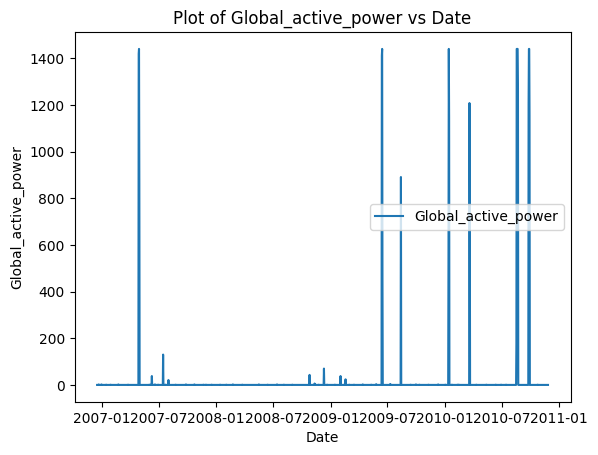

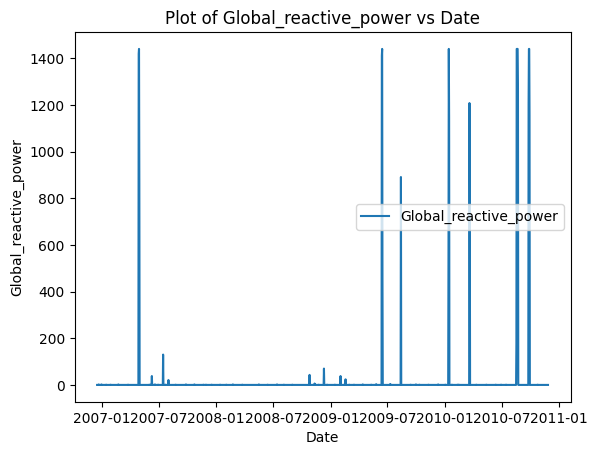

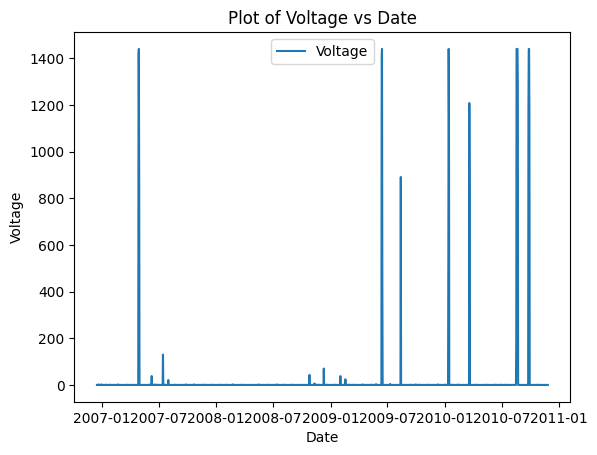

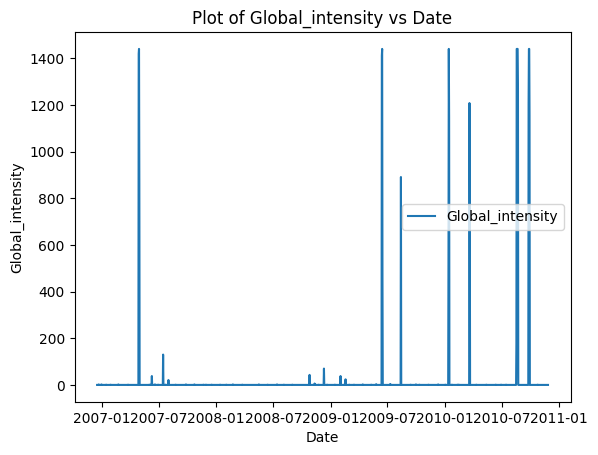

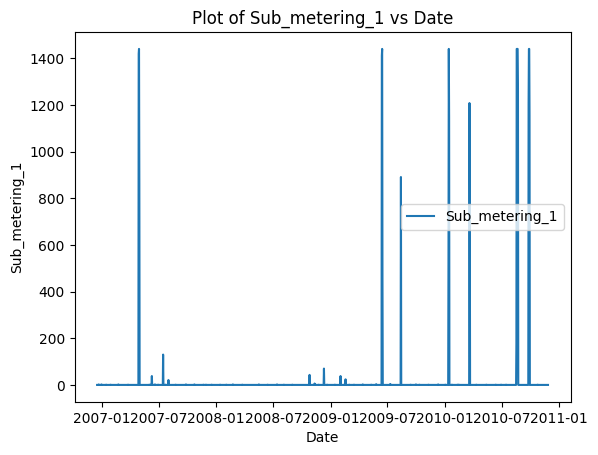

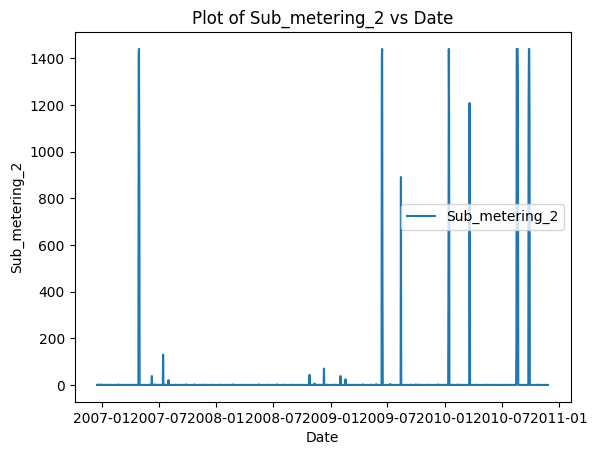

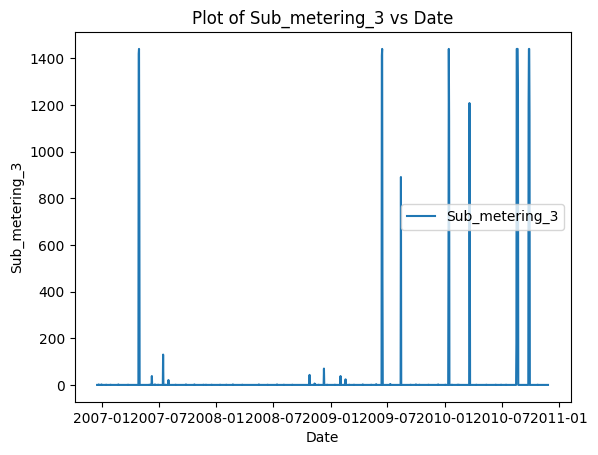

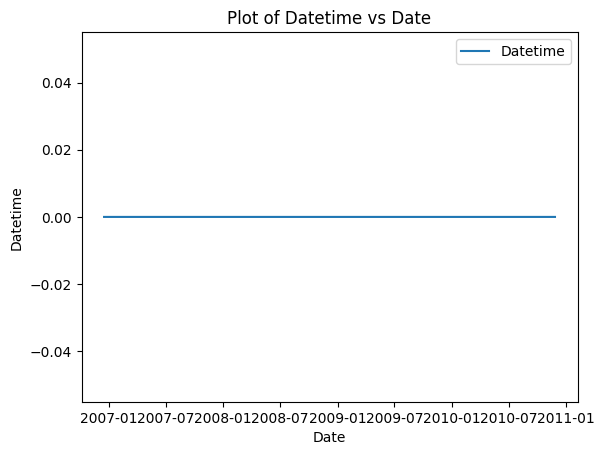

In [31]:

df_na = df.drop('Date', axis=1).isna().groupby(df.Date, sort=False).sum().reset_index()

# Loop through each column and plot
for column in df_na.columns[2:]:
    df_na.plot(x='Date', y=column)
    plt.title(f'Plot of {column} vs Date')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()


<ipython-input-33-5a66281f5806>:19: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


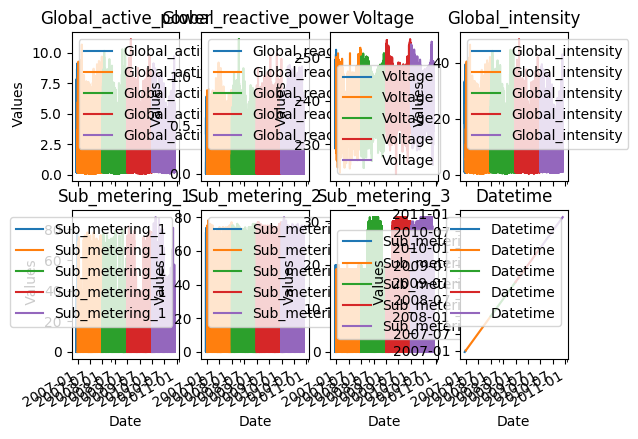

In [33]:
df_na = df.drop('Date', axis=1).isna().groupby(df.Date, sort=False).sum().reset_index()

# Convert 'Date' to datetime to extract year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Create a figure and a grid of subplots
#fig, axes = plt.subplots(nrows=2, ncols=int(len(df_na.columns[2:-1])/2), figsize=(15, 10), sharex=True)
fig, axes = plt.subplots(nrows=2, ncols=int(len(df_na.columns[2:-1])/2), sharex=True)
axes = axes.flatten()

# Loop through each column and create a subplot
for idx, column in enumerate(df_na.columns[2:-1]):
    df.groupby('Year').plot(x='Date', y=column, ax=axes[idx], title=column)
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel(' Values')

# Adjust layout
plt.tight_layout()
plt.show()


**Q: What do you notice about the pattern of missing data?**

A:

1. Around ~26K records seems missing / NaN
2. Global Active Power , Reactive power , Voltage, Global Intensity, sub_metering_1 and sub_metering_2 seems to be fairly smaller than the sub_metering_3

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A:

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [34]:
#clean up missing data here

# Assuming df_raw is your DataFrame
# Interpolate missing values
df_interpolated = df.interpolate(method='linear')

# Display the updated DataFrame
print(df_interpolated.head())


<ipython-input-34-416e445d1c5d>:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear')


        Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  Year  
0 2006-12-16 17:24:00  2006  
1 2006-12-16 17:25:00  2006  
2 2006-1

In [36]:
desc = df_interpolated.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2.075259e+06
mean,.4f,1.0903,0.1236,240.8328,4.6215,1.1095,1.2892,6.4424,.4f,2.008437e+03
min,.4f,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,.4f,2.006000e+03
25%,.4f,0.3100,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,.4f,2.007000e+03
50%,.4f,0.6140,0.1000,241.0000,2.7516,0.0000,0.0000,1.0000,.4f,2.008000e+03
75%,.4f,1.5280,0.1940,242.8700,6.4000,0.0000,1.0000,17.0000,.4f,2.009000e+03
max,.4f,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,.4f,2.010000e+03
std,nan,1.0526,0.1124,3.2378,4.4244,6.1158,5.7866,8.4159,nan,1.128677e+00


<Axes: >

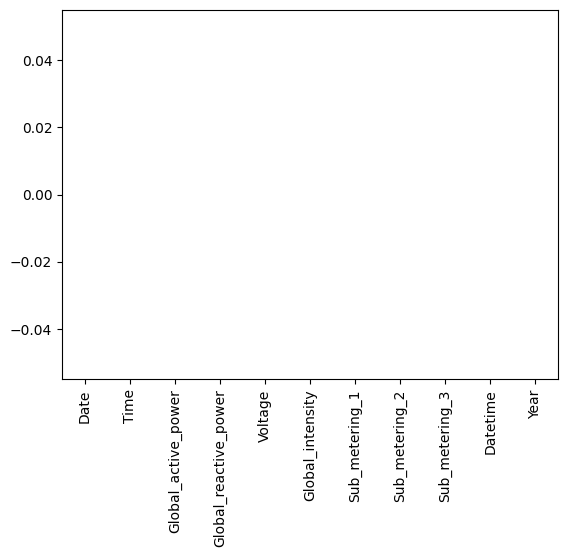

In [35]:
df_interpolated.isna().sum().plot.bar()

After removing all unwanted variables via interpolation

## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: Vlotage and global intensity would be interesting to compare. Alternatively reactive power and Voltage

<Axes: xlabel='Date'>

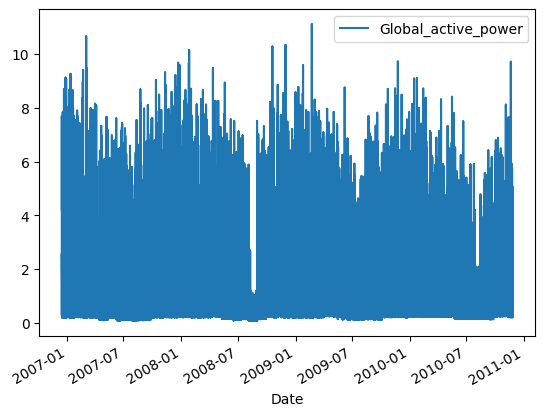

In [37]:
#build your line chart here
df_interpolated.plot('Date', 'Global_active_power')

<Axes: xlabel='Date'>

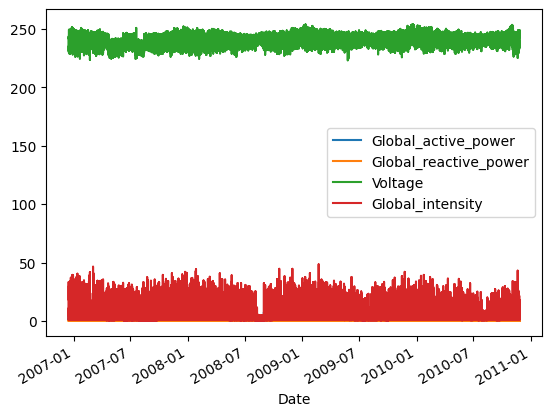

In [38]:
df_interpolated.plot('Date', ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'])

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

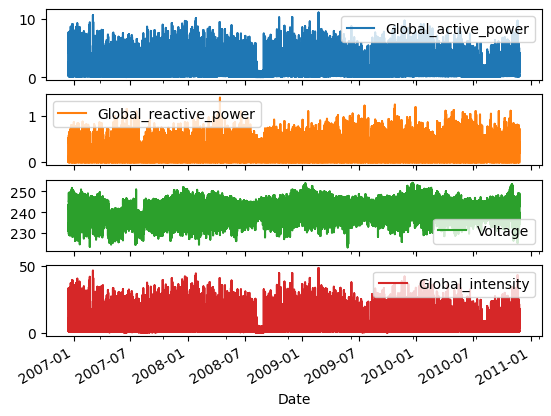

In [40]:
df_interpolated.plot('Date', ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'], kind='line', subplots = True)

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: Yes this would give an equivalent comparision of all the metrics over time with a side by side., and a quick review looks for spikes and troughs for anamolies

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [42]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Convert 'Date' to datetime if it's not already
df_interpolated['Date'] = pd.to_datetime(df_interpolated['Date'])

# Compute monthly averages using pandas.Grouper
df_monthly_avg = df_interpolated.groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()

# Plotting the monthly averages
df_monthly_avg.plot(x='Date', y=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'], kind='line', subplots=True, figsize=(10, 10))

# Display the plots
plt.show()



<ipython-input-42-e34e36a1442b>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df_interpolated.groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()


TypeError: agg function failed [how->mean,dtype->object]

In [43]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Convert 'Date' to datetime if it's not already
df_interpolated['Date'] = pd.to_datetime(df_interpolated['Date'])

# Compute monthly averages using pandas.Grouper, excluding 'Time' column
# The 'Time' column with datetime.time objects is causing the error, so we exclude it.
df_monthly_avg = df_interpolated.drop(columns=['Time']).groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()


<ipython-input-43-a2fd1d0ecb83>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df_interpolated.drop(columns=['Time']).groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()


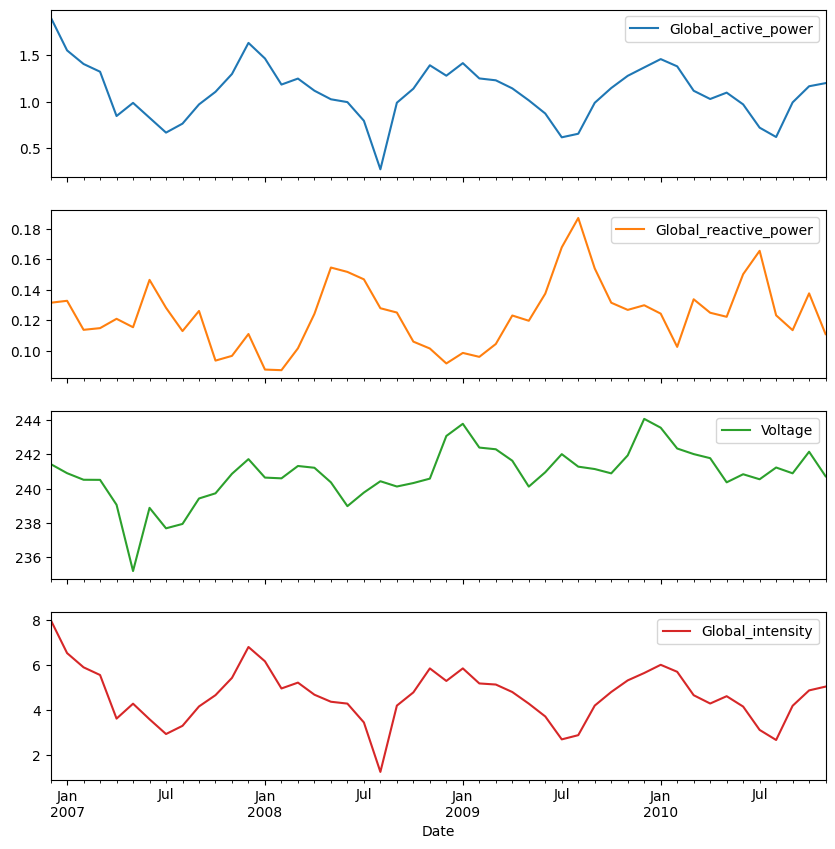

In [44]:
#build your linechart here

# Plotting the monthly averages
df_monthly_avg.plot(x='Date', y=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'], kind='line', subplots=True, figsize=(10, 10))

# Display the plots
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: Voltage, Global Active power and Global Intensity are directly proportional whereas Global Reactive power seems inversely proportional to other metrics

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [52]:
#compute your moving average here

# 'Date' is already datetime and the index, no need to convert or set_index
# df_interpolated['Date'] = pd.to_datetime(df_interpolated['Date'])  # Remove this line
# df_interpolated.set_index('Date', inplace=True)  # Remove this line

# Ensure that relevant columns are numeric
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
for col in cols_to_convert:
    df_interpolated[col] = pd.to_numeric(df_interpolated[col], errors='coerce')


# Compute the 30-day moving average for the specified columns
# Reset index temporarily to apply rolling on columns and avoid potential issues
df_moving_avg = df_interpolated[cols_to_convert].reset_index().rolling(window=30, on='Date').mean().set_index('Date')
# df_moving_avg = df_interpolated[cols_to_convert].rolling(window=30).mean() # Original line

In [53]:
df_moving_avg.describe()

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
count,2.075230e+06,2.075230e+06,2.075230e+06,2.075230e+06
mean,1.090257e+00,4.621385e+00,1.236481e-01,2.408328e+02
std,9.478454e-01,3.971755e+00,7.746603e-02,3.080366e+00
min,8.166667e-02,2.200000e-01,0.000000e+00,2.255873e+02
25%,3.310667e-01,1.460000e+00,6.953333e-02,2.391007e+02
50%,7.210667e-01,3.100000e+00,1.032000e-01,2.409800e+02
75%,1.569533e+00,6.560000e+00,1.593333e-01,2.427573e+02
max,7.966200e+00,3.423333e+01,7.897333e-01,2.524423e+02


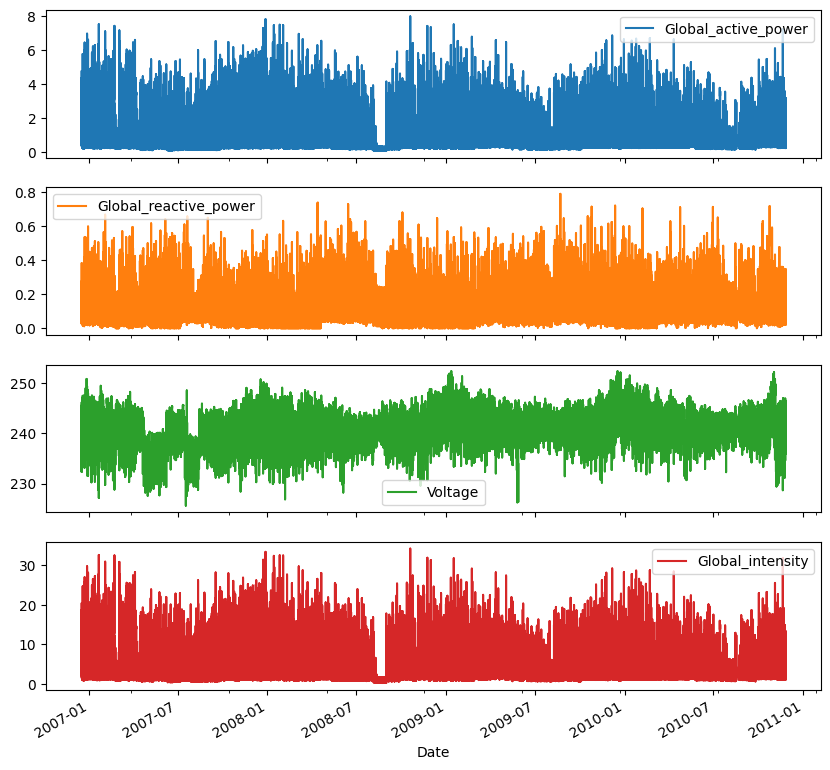

In [54]:
#build your line chart on the moving average here

# Reset index to use 'Date' as a column for plotting
df_moving_avg.reset_index(inplace=True)

# Plotting the 30-day moving averages
df_moving_avg.plot(x='Date', y=cols_to_convert, kind='line', subplots=True, figsize=(10, 10))

# Display the plots
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: Montly average seems to have produced a smooth curve compared to 30 day moving average., so comparitively we can use that.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

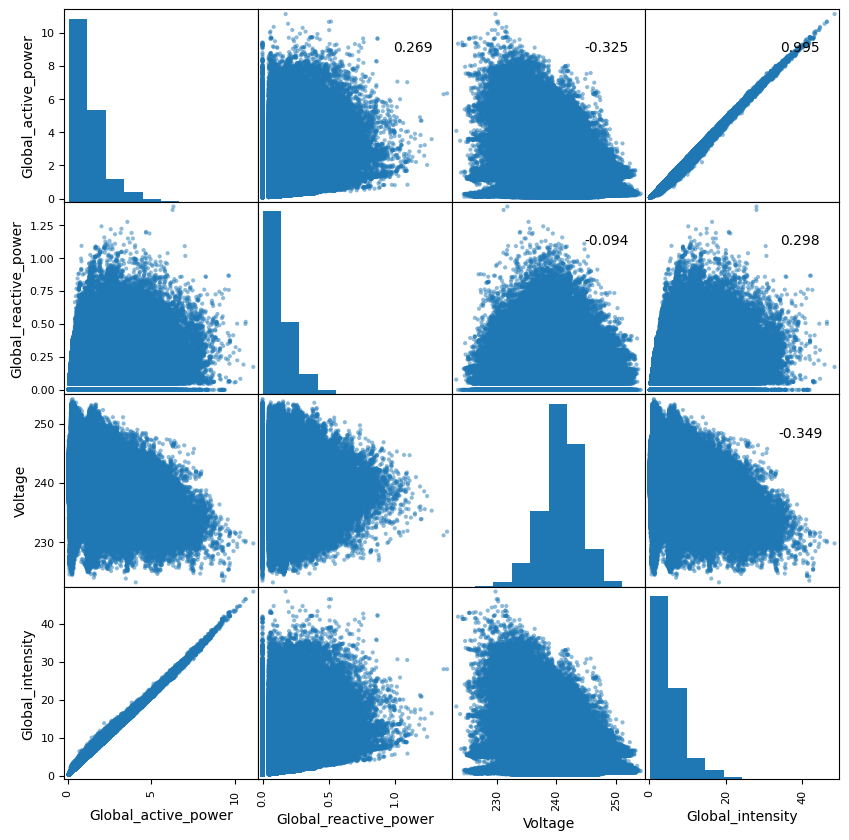

In [47]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: Global Active power and global intensity with 0.995 indicates a strong co-relation

B. Global reactive power seems to be at its peak whent e voltage is at its mean level